In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import dataset as dt
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
a = dt.Dtset(4584)

In [13]:
(x,y),(x_test,y_test) = a.load_data()

#a.x_train = np.array([4])
a.x_validate.shape

(4584, 28, 28)

In [4]:
train_images, validate_images = train_images[10000:],train_images[:10000]
train_labels, validate_labels = train_labels[10000:],train_labels[:10000]

In [5]:
images_width  = train_images.shape[1]
images_height = train_images.shape[1]

train_images = train_images.reshape(train_images.shape[0], images_width, images_height, 1)
validate_images = validate_images.reshape(validate_images.shape[0], images_width, images_height, 1)
test_images = test_images.reshape(test_images.shape[0], images_width, images_height, 1)


In [8]:
model = keras.models.Sequential(
[
	Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(images_width,images_height,1)),
	MaxPooling2D(2,2),
	Dropout(0.3),

	Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
	MaxPooling2D(2,2),
	Dropout(0.3),

	Flatten(),
	Dense(256,activation='relu'),
	Dense(10,activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.fit(train_images,
		 train_labels,
		 batch_size=30,
		 epochs=10,
		 validation_data=(validate_images,validate_labels),
          verbose=1
		 )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 224s 4ms/sample - loss: 1.8651 - accuracy: 0.5967 - val_loss: 1.8432 - val_accuracy: 0.6164
Epoch 2/10
55000/55000 [==============================] - 180s 3ms/sample - loss: 1.8342 - accuracy: 0.6265 - val_loss: 1.8344 - val_accuracy: 0.6262
Epoch 3/10
55000/55000 [==============================] - 209s 4ms/sample - loss: 1.8257 - accuracy: 0.6349 - val_loss: 1.8276 - val_accuracy: 0.6328
Epoch 4/10
55000/55000 [==============================] - 192s 3ms/sample - loss: 1.7633 - accuracy: 0.6969 - val_loss: 1.7438 - val_accuracy: 0.7162
Epoch 5/10
55000/55000 [==============================] - 197s 4ms/sample - loss: 1.7104 - accuracy: 0.7497 - val_loss: 1.5802 - val_accuracy: 0.8802
Epoch 6/10
55000/55000 [==============================] - 193s 4ms/sample - loss: 1.5831 - accuracy: 0.8776 - val_loss: 1.5671 - val_accuracy: 0.8936
Epoch 7/10
55000/55000 [===========================

In [8]:
model.reset_metrics()
# Save the model
model.save('model_PFE_mnist.h5')
model.save('model_PFE_mnist_tf.keras_python.h5', save_format='tf')

In [6]:
model = tf.keras.models.load_model('model_PFE_mnist.h5')

In [7]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 20s - loss: 1.5719 - accuracy: 0.8887

Test accuracy: 0.8887


In [8]:
classifications = model.predict(test_images)
type(classifications)

numpy.ndarray

In [9]:
test_images = test_images.reshape(test_images.shape[0], images_width, images_height)
label = 8452
name = test_labels[label]

#Getting the predicted value 
print(f'Probabities of the {label}th element : \n{classifications[label]}')
name_predicted = classifications[label].argmax()

#Test 
print(f'\nThis {label}th element is probably : {class_names_fr[name_predicted]}')
print(f'This prediction is {class_names_fr[name_predicted] == class_names_fr[name]}') #Shows if the prediction is true or false


Probabities of the 8452th element : 
[5.6350961e-24 7.6079178e-23 8.7980914e-20 1.1818881e-24 3.9215286e-07
 3.5927637e-17 9.0571362e-28 1.6953333e-19 9.9999964e-01 1.1343984e-22]

This 8452th element is probably : Sac
This prediction is True


In [26]:
def plot_prediction(index_test, prediction_result):
  if type(index_test) is not int:
    raise ValueError(f"""Error '{index_test}' is not an integer, aborting...""")
  try:
    label = int(index_test)
    name = test_labels[label]
    
    classifications = prediction_result
    name_predicted = classifications[label].argmax()
  except IndexError:
    quit()
  except ValueError:
    raise ValueError(f"""Value error or the model is not correct! Aborting...""")

  #Drawing the two images
  plt.figure(figsize=(6,6))

  #The image of test
  plt.subplot(1,2,1)
  plt.imshow(test_images[label])
  plt.title(class_names_fr[name])

  #Predicted image
  plt.subplot(1,2,2)
  plt.imshow(test_images[label])

  if class_names_fr[name_predicted] == class_names_fr[name]:
    plt.title(class_names_fr[name_predicted],c='blue')
  else:
    plt.title(class_names_fr[name_predicted],c='red')
  #Drawing in the subplot
  plt.show()

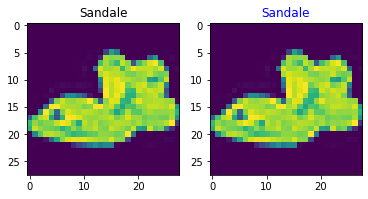

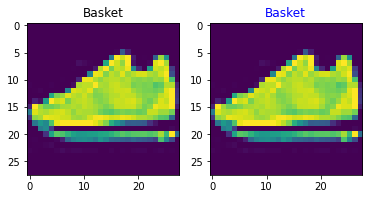

In [134]:
for ii in range(898,900):
    plot_prediction(ii, classifications)

In [174]:
list(np.where(data == 25)[1])

SyntaxError: invalid syntax (<ipython-input-174-28ac30b6b11e>, line 1)

In [152]:
def readImages(path):
    data = plt.imread(path)
    data[data>=255]
    return np.copy(data[10::16,10::16,0])

p = readImages('/home/faouzi/Desktop/ff1.jpg')

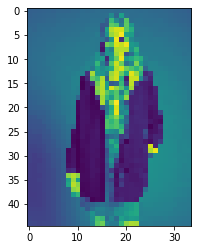

(45, 34)

In [143]:
#p = p.reshape(-1,28)
plt.imshow(p[:,:])
plt.show()
#p = p.reshape(-1,28,1)


ff = plt.imread('/home/faouzi/Desktop/ff1.jpg')
d = np.copy(ff[10::16,10::16,2])
d.shape

In [129]:
for i in range(100):
    if class_names_fr[test_labels[i]] == 'Manteau':
        print(f'index N° {i} : {class_names_fr[test_labels[i]]}')
        
        



index N° 6 : Manteau
index N° 10 : Manteau
index N° 14 : Manteau
index N° 17 : Manteau
index N° 25 : Manteau
index N° 50 : Manteau
index N° 51 : Manteau
index N° 57 : Manteau
index N° 79 : Manteau
index N° 98 : Manteau


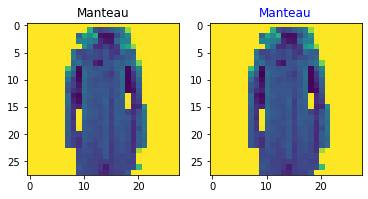

In [133]:
p = p.reshape(-1,28)
test_images[6] = p

plot_prediction(6,classifications)